# Getting the data

Análise de Bloqueios dos ICTs. Entender o BOB e o WOW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
%matplotlib inline
%config IPCompleter.greedy=True

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving DONEtest.txt to DONEtest.txt


In [3]:
import io
bloqueios = pd.read_csv(io.StringIO(uploaded['DONEtest.txt'].decode('utf-8')), sep = " ; ", header=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
bloqueios.head()

,0,1,2,3,4
0,ICT--024,2020-03-01 01:14:04,PSA_BSI_ELECTRONIC_D617-136,Programa Bloqueado : Produção,NaN
1,ICT--028,2020-03-01 02:55:28,PSABSIEBD617FIX5-1955,Programa Bloqueado : Produção,None
2,ICT--023,2020-03-01 04:14:44,PSA_BSI_ELECTRONIC_D617-138,Programa Bloqueado : Produção,None
3,ICT--029,2020-03-01 04:45:33,AUMIB3RSC2-132,Programa Bloqueado : Produção,None
4,ICT--024,2020-03-01 05:16:05,PSA_BSI_ELECTRONIC_D617-136,Programa Bloqueado : Produção,None


# Data Treatment

In [0]:
bloqueios['ICT'] = bloqueios[0]
bloqueios['DATA'] = bloqueios[1]
bloqueios['FIXTURE']= bloqueios[2]
bloqueios['ACTION'] = bloqueios[3]

In [0]:
#bloqueios.drop(0, axis=1, inplace=True)
bloqueios.drop(0, axis=1, inplace=True)
bloqueios.drop(1, axis=1, inplace=True)
bloqueios.drop(2, axis=1, inplace=True)
bloqueios.drop(3, axis=1, inplace=True)
bloqueios.drop(4, axis=1, inplace=True)

In [0]:
Bloqueios = bloqueios[bloqueios.ACTION.str.contains(":")]

In [8]:
SITUATION = Bloqueios["ACTION"].str.split(" : ", n=1, expand = True)
Bloqueios['Situation'] = SITUATION[0]
OCURRENCE = Bloqueios["ACTION"].str.split(" : ", n=1, expand = True)
Bloqueios['Ocurrence'] = OCURRENCE[1]
Bloqueios.drop('ACTION', axis=1, inplace= True )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [9]:
Bloqueios['Ocurrence'] = Bloqueios.Ocurrence.replace({'ProduÃ§Ã£o': 'Producao',
                                                     'ProduÃ§ao': 'Producao'}).astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
Bloqueios['LostTimeProd'] = Bloqueios.Situation.replace({'Programa Bloqueado': '5',
                                                          'ICT Bloqueado (Reiniciar PC)': '10'}).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
Bloqueios['Family'] = Bloqueios["FIXTURE"].str.slice(stop=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
Bloqueios['Family'] = Bloqueios.Family.replace({'PSA': 'BSI','AUM': 'MIB3', 'F13':'Fiat'
                                                  }).astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
Bloqueios['DateHour'] = Bloqueios['DATA'].str.slice(11, 13, 1)
#Bloqueios.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
Bloqueios['DateDay'] = Bloqueios['DATA'].str.slice(8, 11, 1)
Bloqueios.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ICT,DATA,FIXTURE,Situation,Ocurrence,LostTimeProd,Family,DateHour,DateDay
0,ICT--024,2020-03-01 01:14:04,PSA_BSI_ELECTRONIC_D617-136,Programa Bloqueado,Produção,5,BSI,01,01
1,ICT--028,2020-03-01 02:55:28,PSABSIEBD617FIX5-1955,Programa Bloqueado,Produção,5,BSI,02,01
2,ICT--023,2020-03-01 04:14:44,PSA_BSI_ELECTRONIC_D617-138,Programa Bloqueado,Produção,5,BSI,04,01
3,ICT--029,2020-03-01 04:45:33,AUMIB3RSC2-132,Programa Bloqueado,Produção,5,MIB3,04,01
4,ICT--024,2020-03-01 05:16:05,PSA_BSI_ELECTRONIC_D617-136,Programa Bloqueado,Produção,5,BSI,05,01


# Data Analysis Report

In [0]:
tent = Bloqueios.groupby("DateDay").sum()
tent.reset_index(inplace=True)

In [0]:
ict28 = Bloqueios.loc[(Bloqueios['ICT'] =="ICT--028")]
ict28.head()
tent2 = ict28.groupby("DateHour").count()
tent2.reset_index(inplace=True)

In [0]:
ict23 = Bloqueios.loc[(Bloqueios['ICT'] =="ICT--023")]
ict23.head()
tent3 = ict23.groupby("DateHour").count()
tent3.reset_index(inplace=True)
#tent3

In [0]:
ymax_1 = tent2['ICT'].max()
ymax_2 = tent3['ICT'].max()

In [0]:
if ymax_1 > ymax_2:
    ylim_max = ymax_1
else:
    ylim_max = ymax_2

In [0]:
crosstabclass = pd.crosstab([Bloqueios['ICT']], Bloqueios['DateHour'])
#plt.text(-5,-1, "Heat Map", fontsize = 60, color='Black', fontstyle='italic')

Text(-30, 43, "('Tempo perdido em paragens (mensal): aprox. ', 23.75, 'Horas')")

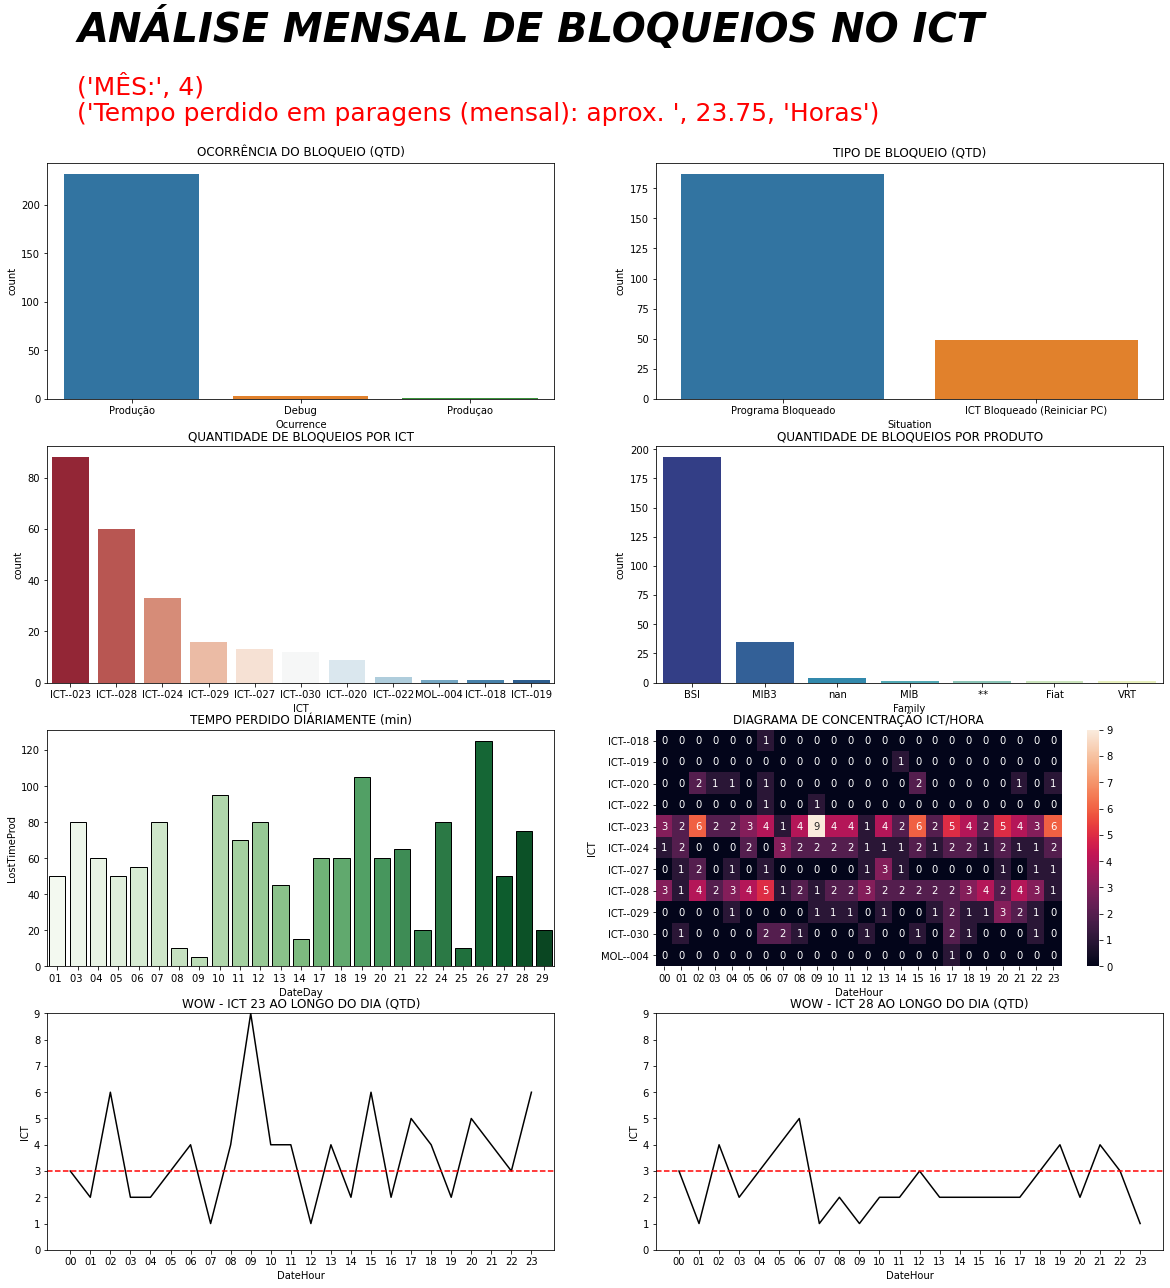

In [23]:
#with PdfPages(r'C:\Users\Tiago\Desktop\Data Analysis\Charts2.pdf') as export_pdf:
#export_pdf.savefig()
#plt.close()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
chart3 = sns.countplot(x="Situation", data=Bloqueios, order = Bloqueios['Situation'].value_counts().index, ax=axes[0,1])
chart3.set_title("TIPO DE BLOQUEIO (QTD)")  
chart4 = sns.countplot(x="Ocurrence", data=Bloqueios, order = Bloqueios['Ocurrence'].value_counts().index,  ax=axes[0,0])
chart4.set_title("OCORRÊNCIA DO BLOQUEIO (QTD)")
chart5 = sns.countplot(x='ICT', data=Bloqueios, order = Bloqueios['ICT'].value_counts().index, ax=axes[1, 0], palette='RdBu')
chart5.set_title("QUANTIDADE DE BLOQUEIOS POR ICT")
chart6 = sns.countplot(x='Family', data=Bloqueios,order = Bloqueios['Family'].value_counts().index, ax=axes[1, 1], palette='YlGnBu_r')
chart6.set_title("QUANTIDADE DE BLOQUEIOS POR PRODUTO")
chart7 = sns.barplot(x='DateDay', y='LostTimeProd', data=tent, ax=axes[2,0], palette='Greens', edgecolor='black')
chart7.set_title("TEMPO PERDIDO DIÁRIAMENTE (min)")
chart8 = sns.lineplot(x='DateHour', y='ICT', data=tent2, ax=axes[3,1], color="black")
chart8.set_title("WOW - ICT 28 AO LONGO DO DIA (QTD)")
chart8.axhline(3, ls='--', color='red')
axes[3,1].set_ylim(0,9)
chart9 = sns.lineplot(x='DateHour', y='ICT', data=tent3, ax=axes[3,0], color="black")
chart9.set_title("WOW - ICT 23 AO LONGO DO DIA (QTD)")
chart9.axhline(3, ls='--', color='red')
axes[3,0].set_ylim(0,ylim_max)
chart10 = sns.heatmap(crosstabclass, annot=True, fmt="d", ax=axes[2,1])
chart10.set_title("DIAGRAMA DE CONCENTRAÇÃO ICT/HORA")
info = (Bloqueios['LostTimeProd'].sum())/60
today = date.today() 
mes = 'MÊS:', today.month
temp_perdido = 'Tempo perdido em paragens (mensal): aprox. ', info, 'Horas'
plt.text(-30,46, "ANÁLISE MENSAL DE BLOQUEIOS NO ICT" , fontsize = 40, color='Black', fontstyle='italic', fontweight='bold')
plt.text(-30,44, mes , fontsize = 25, color='Red', fontstyle='normal')
plt.text(-30,43, temp_perdido , fontsize = 25, color='Red', fontstyle='normal')
#chart10.figure.savefig("BloqueiosReportMensal.pdf")

# Data Analysis Report Daily

In [0]:
Bloqueios.head(2)

In [24]:
#Bloqueios.dtypes
Bloqueios['NewDate'] =  pd.to_datetime(Bloqueios['DATA'], infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
today = date.today()
today2= pd.Timestamp(today)+ pd.DateOffset(-11)
today2

Timestamp('2020-03-25 00:00:00')

In [27]:
dayloc = Bloqueios.loc[(Bloqueios['NewDate'] > today2)]
ict20loc = dayloc.loc[(dayloc['ICT']== "ICT--020")]
ict20daily = ict20loc.groupby("DateHour").count()
ict20daily.reset_index(inplace=True)
ict20daily

,DateHour,ICT,DATA,FIXTURE,Situation,Ocurrence,LostTimeProd,Family,DateDay,NewDate
0,02,2,2,2,2,2,2,2,2,2
1,21,1,1,1,1,1,1,1,1,1


In [0]:
ict22loc = dayloc.loc[(dayloc['ICT']== "ICT--022")]
ict22daily = ict22loc.groupby("DateHour").count()
ict22daily.reset_index(inplace=True)
#ict22daily

In [0]:
ict23loc = dayloc.loc[(dayloc['ICT']== "ICT--023")]
ict23daily = ict23loc.groupby("DateHour").count()
ict23daily.reset_index(inplace=True)
#ict22daily

In [0]:
ict24loc = dayloc.loc[(dayloc['ICT']== "ICT--024")]
ict24daily = ict24loc.groupby("DateHour").count()
ict24daily.reset_index(inplace=True)
#ict22daily

In [0]:
ict27loc = dayloc.loc[(dayloc['ICT']== "ICT--027")]
ict27daily = ict27loc.groupby("DateHour").count()
ict27daily.reset_index(inplace=True)
#ict22daily

In [0]:
ict28loc = dayloc.loc[(dayloc['ICT']== "ICT--028")]
ict28daily = ict28loc.groupby("DateHour").count()
ict28daily.reset_index(inplace=True)
#ict22daily

In [0]:
ict29loc = dayloc.loc[(dayloc['ICT']== "ICT--029")]
ict29daily = ict29loc.groupby("DateHour").count()
ict29daily.reset_index(inplace=True)
#ict22daily

In [0]:
ict30loc = dayloc.loc[(dayloc['ICT']== "ICT--030")]
ict30daily = ict30loc.groupby("DateHour").count()
ict30daily.reset_index(inplace=True)
#ict22daily

In [0]:
crosstabclass2 = pd.crosstab([dayloc['ICT']], Bloqueios['DateHour'])
#crosstabclass2

Text(-70, -23, "('Tempo perdido em paragens (diário): aprox. ', 4.666666666666667, 'Horas')")

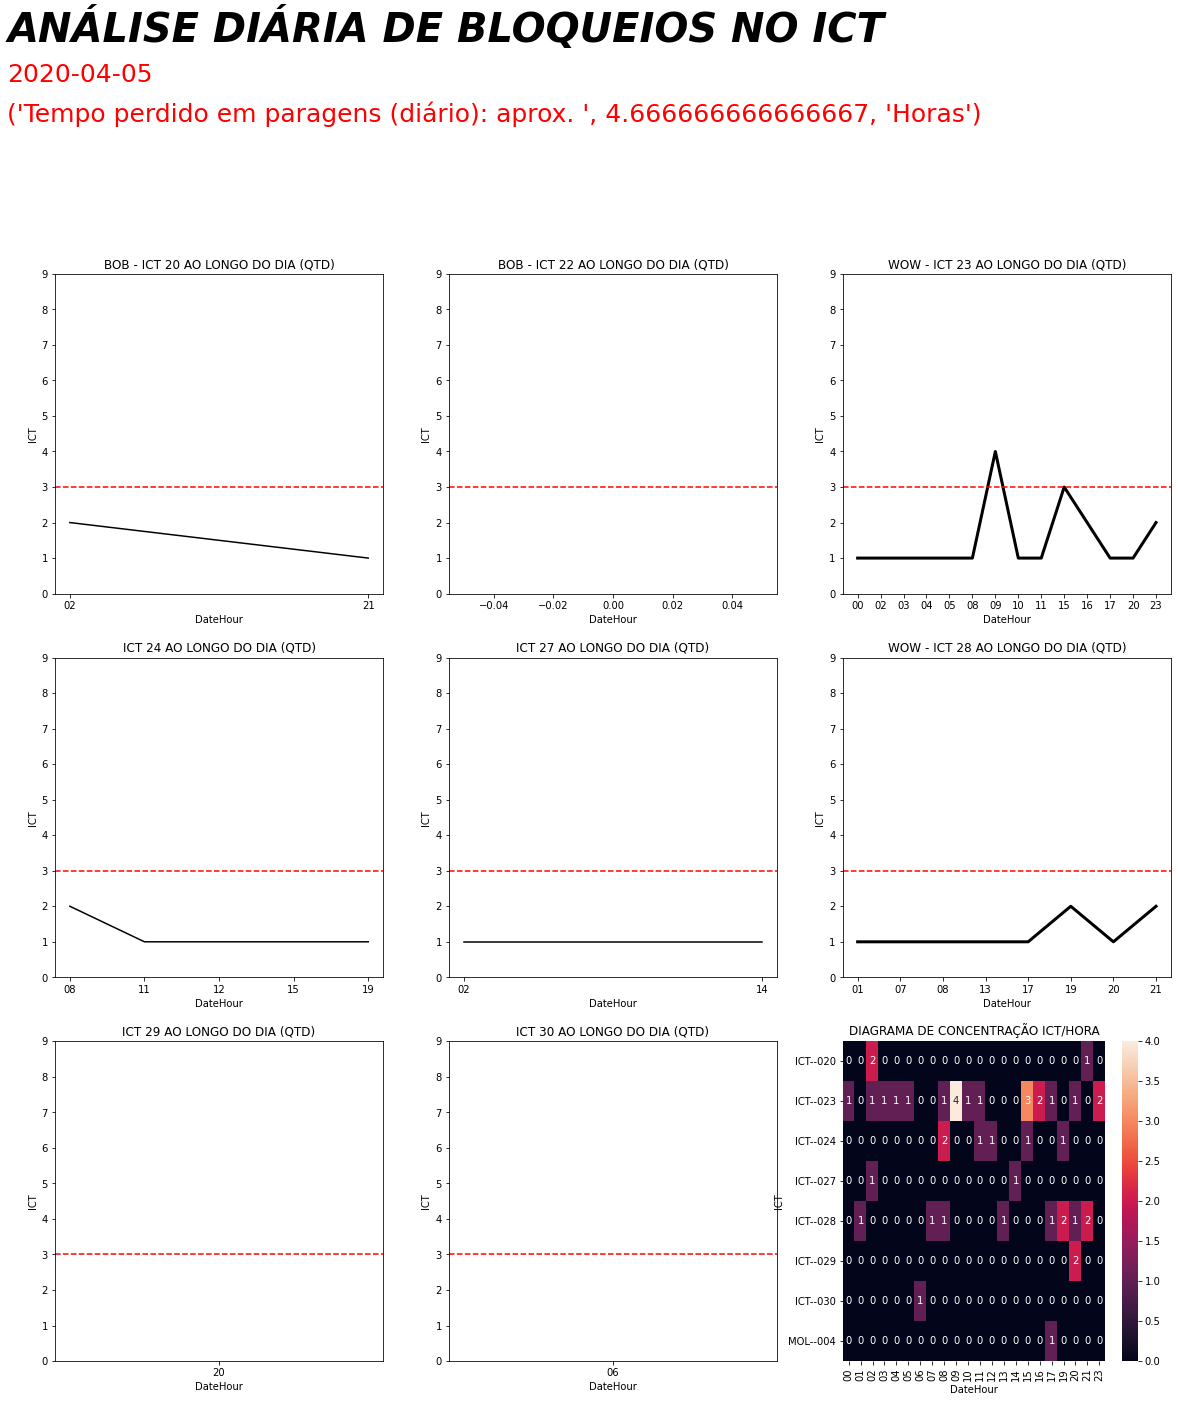

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

chart11 = sns.lineplot(x='DateHour', y='ICT', data=ict20daily, ax=axes[0,0], color="black")
chart11.set_title("BOB - ICT 20 AO LONGO DO DIA (QTD)")
chart11.axhline(3, ls='--', color='red')
axes[0,0].set_ylim(0,ylim_max)

chart12 = sns.lineplot(x='DateHour', y='ICT', data=ict22daily, ax=axes[0,1], color="black")
chart12.set_title("BOB - ICT 22 AO LONGO DO DIA (QTD)")
chart12.axhline(3, ls='--', color='red')
axes[0,1].set_ylim(0,ylim_max)

chart13 = sns.lineplot(x='DateHour', y='ICT', data=ict23daily, ax=axes[0,2], color="black", lw=3)
chart13.set_title("WOW - ICT 23 AO LONGO DO DIA (QTD)")
chart13.axhline(3, ls='--', color='red')
axes[0,2].set_ylim(0,ylim_max)

chart14 = sns.lineplot(x='DateHour', y='ICT', data=ict24daily, ax=axes[1,0], color="black")
chart14.set_title("ICT 24 AO LONGO DO DIA (QTD)")
chart14.axhline(3, ls='--', color='red')
axes[1,0].set_ylim(0,ylim_max)

chart15 = sns.lineplot(x='DateHour', y='ICT', data=ict27daily, ax=axes[1,1], color="black")
chart15.set_title("ICT 27 AO LONGO DO DIA (QTD)")
chart15.axhline(3, ls='--', color='red')
axes[1,1].set_ylim(0,ylim_max)

chart16 = sns.lineplot(x='DateHour', y='ICT', data=ict28daily, ax=axes[1,2], color="black", lw=3)
chart16.set_title("WOW - ICT 28 AO LONGO DO DIA (QTD)")
chart16.axhline(3, ls='--', color='red')
axes[1,2].set_ylim(0,ylim_max)

chart17 = sns.lineplot(x='DateHour', y='ICT', data=ict29daily, ax=axes[2,0], color="black")
chart17.set_title("ICT 29 AO LONGO DO DIA (QTD)")
chart17.axhline(3, ls='--', color='red')
axes[2,0].set_ylim(0,ylim_max)

chart17 = sns.lineplot(x='DateHour', y='ICT', data=ict30daily, ax=axes[2,1], color="black")
chart17.set_title("ICT 30 AO LONGO DO DIA (QTD)")
chart17.axhline(3, ls='--', color='red')
axes[2,1].set_ylim(0,ylim_max)

chart18 = sns.heatmap(crosstabclass2, annot=True, fmt="d", ax=axes[2,2])
chart18.set_title("DIAGRAMA DE CONCENTRAÇÃO ICT/HORA")

infohoje = (dayloc['LostTimeProd'].sum())/60
hoje = date.today() 
#mes = 'MÊS:', today.month
temp_perdido_hoje = 'Tempo perdido em paragens (diário): aprox. ', infohoje, 'Horas'
plt.text(-70,-25, "ANÁLISE DIÁRIA DE BLOQUEIOS NO ICT" , fontsize = 40, color='Black', fontstyle='italic', fontweight='bold')
plt.text(-70,-24, hoje , fontsize = 25, color='Red', fontstyle='normal')
plt.text(-70,-23, temp_perdido_hoje , fontsize = 25, color='Red', fontstyle='normal')
#chart18.figure.savefig("BloqueiosReportDiario.pdf")